#### Análisis exploratorio de datos sobre la violencia criminal en Honduras

In [65]:
# Cargamos las librerias necesarias para realizar el análisis exploratorio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [66]:
# Cargamos la base de datos general de UNOCD y se realiza una primera revision del dataset

datos = pd.read_excel('datasets/data_cts_intentional_homicide.xlsx', skiprows=2)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118401 entries, 0 to 118400
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Iso3_code            118401 non-null  object 
 1   Country              118397 non-null  object 
 2   Region               118397 non-null  object 
 3   Subregion            118397 non-null  object 
 4   Indicator            118401 non-null  object 
 5   Dimension            118401 non-null  object 
 6   Category             118401 non-null  object 
 7   Sex                  118401 non-null  object 
 8   Age                  118401 non-null  object 
 9   Year                 118401 non-null  int64  
 10  Unit of measurement  118401 non-null  object 
 11  VALUE                118401 non-null  float64
 12  Source               118401 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.7+ MB


In [67]:
# Revisamos la distribución de los datos en la columna 'Subregion'

print(datos['Subregion'].value_counts())

Subregion
Latin America and the Caribbean    38929
Southern Europe                    16831
Northern Europe                    14935
Western Europe                      9915
Eastern Europe                      9402
Western Asia                        6089
Eastern Asia                        4598
Northern America                    4544
Sub-Saharan Africa                  3052
Southern Asia                       2396
Northern Africa                     2100
Australia and New Zealand           2001
South-eastern Asia                  1405
Central Asia                         946
Polynesia                            200
Melanesia                            142
Africa                               138
Americas                             138
Asia                                 138
Europe                               138
Oceania                              138
World                                138
Micronesia                            84
Name: count, dtype: int64


In [68]:
# Revisamos la distribución de los datos en la columna 'Indicator'

print(datos['Indicator'].value_counts())

Indicator
Victims of intentional homicide                        90519
Persons arrested/suspected for intentional homicide    18824
Victims of intentional homicide – City-level data       4276
Persons convicted for intentional homicide              2612
Death due to intentional homicide in prison             1342
Victims of Intentional Homicide - Regional Estimate      828
Name: count, dtype: int64


In [69]:
# Revisamos la distribución de los datos en la columna 'Dimension'

print(datos['Dimension'].value_counts())

Dimension
Total                             65286
by relationship to perpetrator    22644
by situational context            13882
by mechanisms                      9304
by location                        4276
by citizenship                     3009
Name: count, dtype: int64


In [70]:
print(datos['Category'].value_counts())

Category
Total                                                  65286
Intimate partner or family member                       6100
Intimate partner or family member: Intimate partner     4622
Other criminal activities                               4006
Intimate partner or family member: Family member        3300
Organized criminal groups or gangs                      3086
Other Perpetrator known to the victim                   2924
Perpetrator to victim relationship unknown              2894
Perpetrator unknown to the victim                       2804
Interpersonal homicide                                  2154
Firearms or explosives - firearms                       2118
Another weapon - sharp object                           2062
2nd largest city                                        1908
Unspecified means                                       1752
Unknown types of homicide                               1750
National citizens                                       1559
Socio-political

In [71]:
# Revisa la distribución de los datos en la columna 'Sex'

print(datos['Sex'].value_counts())

Sex
Male      40025
Female    39338
Total     39038
Name: count, dtype: int64


In [72]:
print(datos['Age'].value_counts())


Age
Total           77625
30-44            6572
60 and older     6524
45-59            6504
25-29            4862
20-24            3892
18-19            3772
0-9              3372
15 -17           1948
10 -14           1697
Unknown          1633
Name: count, dtype: int64


In [73]:
# Revisa la distribución de los datos en la columna 'Unit of measurement'

print(datos['Unit of measurement'].value_counts())

Unit of measurement
Counts                         63347
Rate per 100,000 population    55054
Name: count, dtype: int64


In [74]:
# Vamos a filtrar los datos para quedarnos con los datos de homicidios intencionales en América Latina y el Caribe, además de su dimensión, categoría, sexo y edad en su totalidad para realizar un análisis macro, de la unidad de medida 'Tasa de homicidios por cada 100,000 habitantes' y filtrando entre los años que comprenden nuestro estudio de caso

latam = datos[
    (datos['Subregion'] == 'Latin America and the Caribbean') &
    (datos['Indicator'] == 'Victims of intentional homicide') &
    (datos['Dimension'] == 'Total') &
    (datos['Category'] == 'Total') &
    (datos['Sex'] == 'Total') &
    (datos['Age'] == 'Total') &
    (datos['Unit of measurement'] == 'Rate per 100,000 population') &
    (datos['Year'] >= 2002) &
    (datos['Year'] <= 2022)
]

In [75]:
# Se obtiene información general de las columnas de la variable 'latam'

latam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 64638 to 67542
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iso3_code            765 non-null    object 
 1   Country              765 non-null    object 
 2   Region               765 non-null    object 
 3   Subregion            765 non-null    object 
 4   Indicator            765 non-null    object 
 5   Dimension            765 non-null    object 
 6   Category             765 non-null    object 
 7   Sex                  765 non-null    object 
 8   Age                  765 non-null    object 
 9   Year                 765 non-null    int64  
 10  Unit of measurement  765 non-null    object 
 11  VALUE                765 non-null    float64
 12  Source               765 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 83.7+ KB


In [76]:
# Se imprime información de los datos en el encabezado

print(latam.head(5))

      Iso3_code              Country    Region  \
64638       ABW                Aruba  Americas   
64639       AIA             Anguilla  Americas   
64641       ARG            Argentina  Americas   
64644       ATG  Antigua and Barbuda  Americas   
64652       BHS              Bahamas  Americas   

                             Subregion                        Indicator  \
64638  Latin America and the Caribbean  Victims of intentional homicide   
64639  Latin America and the Caribbean  Victims of intentional homicide   
64641  Latin America and the Caribbean  Victims of intentional homicide   
64644  Latin America and the Caribbean  Victims of intentional homicide   
64652  Latin America and the Caribbean  Victims of intentional homicide   

      Dimension Category    Sex    Age  Year          Unit of measurement  \
64638     Total    Total  Total  Total  2002  Rate per 100,000 population   
64639     Total    Total  Total  Total  2002  Rate per 100,000 population   
64641     Total  

In [77]:
# Para buscar los coeficientes de correlación se deben tener dos variables x, y. La variable dependiente podrían ser los valores anuales de homicidios en Honduras y la independiente, los valores de los demás países que no son Honduras
# La función pivot table nos permite reorganizar los datos para que los países sean las columnas y los años sean los índices. Los valores serán las observaciones.

latam_pivot = latam.pivot_table(index='Year', columns='Country', values='VALUE')
latam_pivot.index

Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='Year')

In [78]:
# Se obtiene información de las columnas

print(latam_pivot.columns)

Index(['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'French Guiana', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique',
       'Mexico', 'Montserrat', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Martin (French Part)', 'Saint Vincent and the Grenadines',
       'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands',
       'United States Virgin Islands', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'],
      dtype='object', name='Country')


In [79]:
# Se obtiene información de los datos en el encabezado

print(latam_pivot.head())

# Se concluye que la función pivot fue correcta, ahora la distribución de los datos en latam_pivot nos permitirá calcular el coeficiente de correlación entre Honduras y los demás países, además de realizar los diagrámas de dispersión

Country   Anguilla  Antigua and Barbuda  Argentina     Aruba    Bahamas  \
Year                                                                      
2002     17.113764             6.490809   9.387486  5.471747  15.680882   
2003     16.842814             6.419804   7.721680  4.333225  14.897912   
2004      8.286721             5.081333   6.023302  2.145635  12.949479   
2005      0.000000             3.768347   5.604742  6.367399  15.120938   
2006     40.097839            13.646965   5.327833  5.241502  17.509867   

Country   Barbados     Belize  Bolivia (Plurinational State of)     Brazil  \
Year                                                                         
2002      9.464391  33.983247                               NaN  27.848196   
2003     12.416471  25.399955                               NaN  28.271088   
2004      8.230514  29.077418                               NaN  26.491836   
2005     10.792465  28.956442                               NaN  25.769392   
2006  

In [80]:
# Se cálcula la matriz de correlación (método de Pearson) para los países de Latinoamérica y se filtra el resultado de Honduras (el único que nos interesa)

correlacion= latam_pivot.corr(method='pearson', min_periods=1, numeric_only=False)
honduras = correlacion['Honduras']

print(honduras)

Country
Anguilla                             -0.204726
Antigua and Barbuda                  -0.067901
Argentina                             0.469788
Aruba                                -0.336482
Bahamas                               0.329894
Barbados                             -0.544780
Belize                                0.454652
Bolivia (Plurinational State of)      0.464320
Brazil                                0.494816
British Virgin Islands               -0.024971
Cayman Islands                        0.608545
Chile                                -0.671494
Colombia                              0.188374
Costa Rica                           -0.167203
Cuba                                  0.104456
Curaçao                               0.937806
Dominica                             -0.302764
Dominican Republic                    0.601411
Ecuador                               0.107620
El Salvador                           0.349908
French Guiana                         0.018144
Grena

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr

De acuerdo con la documentación de Pandas, la función '.corr()' realiza el cálculo de la correlación por pares de columnas, excluyendo los valores NA/nulo/faltantes.

En 'method=' se puede elegir Pearson.

En Min_periodsint, se establece el número mínimo de observaciones requeridas por par de columnas para tener un resultado válido.

En Numeric_only se establece si puede incluir solo datos flotantes, int o booleanos.

La salidad (output) de esta función nos regresará una mátriz de correlación.

In [81]:
# Se convierte el objeto series en un dataframe para poder ordenar los valores, se excluye la correlación de Honduras-Honduras y se ordenan de mayor a menor.

honduras = pd.DataFrame(honduras)
honduras = honduras.reset_index()
honduras.columns = ['País', 'Correlación']
honduras = honduras[honduras['País'] != 'Honduras']
honduras = honduras.sort_values(by='Correlación', ascending=False)
print(honduras)

                                  País  Correlación
15                             Curaçao     0.937806
35                         Puerto Rico     0.833888
32                              Panama     0.722674
43        United States Virgin Islands     0.641193
45  Venezuela (Bolivarian Republic of)     0.615832
10                      Cayman Islands     0.608545
17                  Dominican Republic     0.601411
36               Saint Kitts and Nevis     0.498324
8                               Brazil     0.494816
2                            Argentina     0.469788
7     Bolivia (Plurinational State of)     0.464320
6                               Belize     0.454652
23                           Guatemala     0.446604
19                         El Salvador     0.349908
4                              Bahamas     0.329894
24                              Guyana     0.287841
22                          Guadeloupe     0.285062
30                          Montserrat     0.280613
31          

In [82]:
# Se crea una nueva variable con datos filtrados  para obtener los paises con una correlación mayor a 0.5 o menor a -0.5 (positiva fuerte o negativa fuerte), que pudierán ser útiles para explicar algo por este método

corr_true_honduras = honduras[(honduras['Correlación'] >= 0.5) | (honduras['Correlación'] <= -0.5)]

In [83]:
# Se imprimen los valores en pantalla

print(corr_true_honduras)

                                  País  Correlación
15                             Curaçao     0.937806
35                         Puerto Rico     0.833888
32                              Panama     0.722674
43        United States Virgin Islands     0.641193
45  Venezuela (Bolivarian Republic of)     0.615832
10                      Cayman Islands     0.608545
17                  Dominican Republic     0.601411
34                                Peru    -0.537884
5                             Barbados    -0.544780
42            Turks and Caicos Islands    -0.662215
11                               Chile    -0.671494
28                          Martinique    -0.913985


In [84]:
# Ahora... regresamos a la base latam_pivot para revisar la calidad de los datos que nos presenta en aquellos casos donde el coeficiente de correlación fue (+- 0.5)

dispersion = latam_pivot[['Honduras', 'Curaçao', 'Puerto Rico', 'Panama', 'United States Virgin Islands', 'Venezuela (Bolivarian Republic of)', 'Cayman Islands', 'Dominican Republic', 'Peru', 'Barbados', 'Turks and Caicos Islands', 'Chile', 'Martinique']]
dispersion

Country,Honduras,Curaçao,Puerto Rico,Panama,United States Virgin Islands,Venezuela (Bolivarian Republic of),Cayman Islands,Dominican Republic,Peru,Barbados,Turks and Caicos Islands,Chile,Martinique
Year,,,,,,,,,,,,,
2002,52.213199,26.730454,21.518286,12.015298,37.816773,37.809107,0.000000,14.448329,NaN,9.464391,9.710152,NaN,NaN
2003,57.211380,29.071438,21.492138,10.564903,28.658593,43.803846,6.828347,21.178939,NaN,12.416471,0.000000,3.201298,NaN
2004,49.856182,27.370466,22.192057,9.473558,34.311839,36.897080,11.024994,24.591176,NaN,8.230514,NaN,NaN,4.690240
2005,42.950625,17.182925,21.776917,10.986936,34.384540,37.198809,6.411969,25.951124,NaN,10.792465,0.000000,3.523199,4.728168
2006,40.721802,11.802892,20.735048,6.548101,40.018613,45.021640,2.073312,22.952126,NaN,12.962891,NaN,3.573766,5.743539
2007,45.795690,16.919813,20.568217,8.116387,40.101092,47.581566,4.025198,22.325258,NaN,9.215282,7.613392,3.694911,5.738430
2008,55.600020,NaN,23.312091,14.083105,43.006731,52.003843,7.819908,25.007495,NaN,8.433728,7.291952,3.491896,4.242618
2009,64.469663,NaN,25.595617,15.767114,46.834459,49.176642,15.203778,24.496494,NaN,6.931208,6.995820,3.703762,2.753297
2010,74.540895,NaN,27.726661,12.677293,52.675640,45.396016,16.636321,25.193034,NaN,11.262755,NaN,3.148742,NaN


In [85]:
# Se concluye que: 1. Curaçao, United States Virgin Islands, Cayman Islands, Perú, Turks and Caicos Islands y Martinique tienen varios datos faltantes y no son útiles para realizar un análisis. 2. Venezuela y la República Dominicana tienen entre 1 y dos datos faltantes, aún así, a pesar de estos datos, serán útiles para realizar un análisis. 3. Puerto Rico, Panamá y Barbados cuentan con una totalidad de datos limpios y serán útiles para un análisis. 4. Si bien se encontró correlación negativa con Chile, su tasa de homicidios en muy baja, además la distancia entre este país y Honduras es muy amplía y no existe información proporcionada en la revisión de literatura que pudiera explicar alguna relación, se decide elimianarlo del análisi

dispersion = dispersion[['Honduras', 'Puerto Rico', 'Panama', 'Venezuela (Bolivarian Republic of)', 'Dominican Republic', 'Barbados']]
dispersion

Country,Honduras,Puerto Rico,Panama,Venezuela (Bolivarian Republic of),Dominican Republic,Barbados
Year,,,,,,
2002,52.213199,21.518286,12.015298,37.809107,14.448329,9.464391
2003,57.211380,21.492138,10.564903,43.803846,21.178939,12.416471
2004,49.856182,22.192057,9.473558,36.897080,24.591176,8.230514
2005,42.950625,21.776917,10.986936,37.198809,25.951124,10.792465
2006,40.721802,20.735048,6.548101,45.021640,22.952126,12.962891
2007,45.795690,20.568217,8.116387,47.581566,22.325258,9.215282
2008,55.600020,23.312091,14.083105,52.003843,25.007495,8.433728
2009,64.469663,25.595617,15.767114,49.176642,24.496494,6.931208
2010,74.540895,27.726661,12.677293,45.396016,25.193034,11.262755


In [86]:
# Se revisa la información del dataframe para realizar el análisis de regresión

dispersion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2002 to 2022
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Honduras                            21 non-null     float64
 1   Puerto Rico                         21 non-null     float64
 2   Panama                              21 non-null     float64
 3   Venezuela (Bolivarian Republic of)  19 non-null     float64
 4   Dominican Republic                  20 non-null     float64
 5   Barbados                            21 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


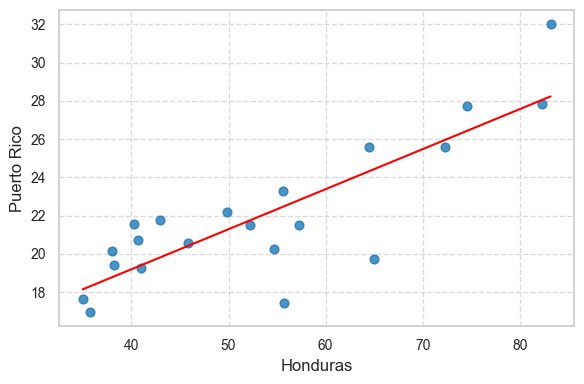

In [87]:
# Diagrama de dispersión entre Puerto Rico y Honduras

plt.figure(figsize=(6, 4))

sns.set(style="whitegrid", palette="muted")

sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Puerto Rico',
            scatter_kws={"s": 40, "alpha": 0.8, "color": "#1f77b4"},
            line_kws={"color": "red", "linewidth": 1.5},
            ci=None)

#plt.title('Relación entre tasa de homicidios de Honduras y Puerto Rico (2002-2022)', fontsize=16, weight='bold')
plt.xlabel('Honduras', fontsize=12)
plt.ylabel('Puerto Rico', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('gráficas_regresión/regresion_honduras_puerto_rico.png', dpi=300, bbox_inches='tight')

plt.show()

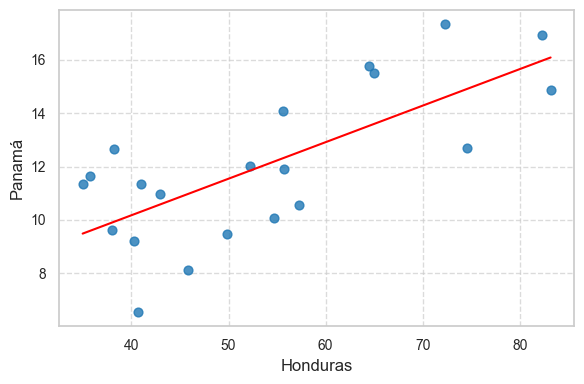

In [88]:
plt.figure(figsize=(6, 4))

sns.set(style="whitegrid", palette="muted")

sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Panama',
            scatter_kws={"s": 40, "alpha": 0.8, "color": "#1f77b4"},
            line_kws={"color": "red", "linewidth": 1.5},
            ci=None)

#plt.title('Relación entre tasa de homicidios de Honduras y Panamá (2002-2022)', fontsize=16, weight='bold')
plt.xlabel('Honduras', fontsize=12)
plt.ylabel('Panamá', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('gráficas_regresión/regresion_honduras_panama.png', dpi=300, bbox_inches='tight')


plt.show()

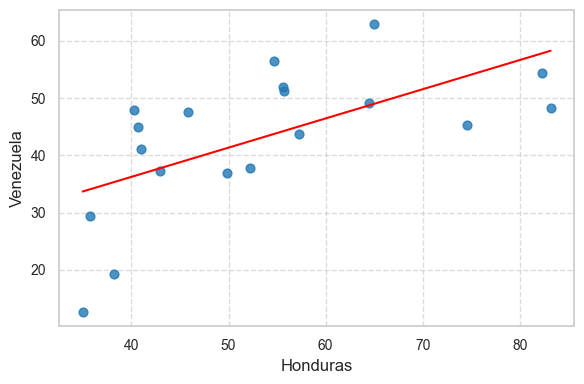

In [89]:
plt.figure(figsize=(6, 4))

sns.set(style="whitegrid", palette="muted")

sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Venezuela (Bolivarian Republic of)',
            scatter_kws={"s": 40, "alpha": 0.8, "color": "#1f77b4"},
            line_kws={"color": "red", "linewidth": 1.5},
            ci=None)

#plt.title('Relación entre tasa de homicidios de Honduras y Venezuela (2002-2022)', fontsize=16, weight='bold')
plt.xlabel('Honduras', fontsize=12)
plt.ylabel('Venezuela', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('gráficas_regresión/regresion_honduras_venezuela.png', dpi=300, bbox_inches='tight')

plt.show()

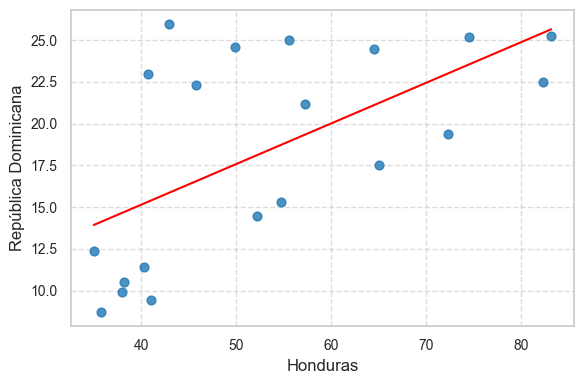

<Figure size 800x600 with 0 Axes>

In [90]:
plt.figure(figsize=(6, 4))

sns.set(style="whitegrid", palette="muted")

sns.regplot(data=dispersion, 
            x='Honduras', 
            y='Dominican Republic',
            scatter_kws={"s": 40, "alpha": 0.8, "color": "#1f77b4"},
            line_kws={"color": "red", "linewidth": 1.5},
            ci=None)

#plt.title('Relación entre tasa de homicidios de Honduras y República Dominicana (2002-2022)', fontsize=16, weight='bold')
plt.xlabel('Honduras', fontsize=12)
plt.ylabel('República Dominicana', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('gráficas_regresión/regresion_honduras_dominicana.png', dpi=300, bbox_inches='tight')


plt.figure(figsize=(8, 6))
plt.show()

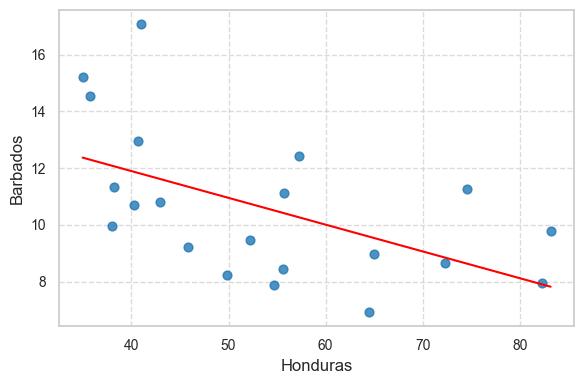

In [91]:
plt.figure(figsize=(6, 4))

sns.set(style="whitegrid", palette="muted")

sns.regplot(data=dispersion,
            x='Honduras',
            y='Barbados',
            scatter_kws={"s": 40, "alpha": 0.8, "color": "#1f77b4"},
            line_kws={"color": "red", "linewidth": 1.5},
            ci=None)

#plt.title('Relación entre tasa de homicidios de Honduras y Barbados (2002-2022)', fontsize=16, weight='bold')
plt.xlabel('Honduras', fontsize=12)
plt.ylabel('Barbados', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('gráficas_regresión/regresion_honduras_barbados.png', dpi=300, bbox_inches='tight')


plt.show()

Ahora, será útil calcular la pendiente de regresión, recta de regresión, r cuadrado, etc.

In [92]:
# Puerto Rico

# Recta de regresión
m_hnpr, b_hnpr = np.polyfit(dispersion['Honduras'], dispersion['Puerto Rico'], 1)

print(f'La ecuación de la recta de regresión entre Honduras y Puerto Rico es: y = {m_hnpr:.2f}x + {b_hnpr:.2f}')

# Error estándar de estimación

y_pred_prhn = m_hnpr * dispersion['Honduras'] + b_hnpr

err_est_prhn = np.sqrt(np.sum((dispersion['Puerto Rico'] - y_pred_prhn) ** 2) / (len(dispersion) - 2))

print(f'El error estándar de estimación entre Honduras y Puerto Rico es (SEE): {err_est_prhn:.4f}')

# Cálculo del coeficiente de determinación

SSE_prhn = np.sum((dispersion['Puerto Rico'] - y_pred_prhn) ** 2)

SST_prhn = np.sum((dispersion['Puerto Rico'] - np.mean(dispersion['Puerto Rico'])) ** 2)

R2_prhn = 1 - (SSE_prhn / SST_prhn)

print(f'Coeficiente de determinación (R²) entre Honduras y Puerto Rico: {R2_prhn:.4f}')

La ecuación de la recta de regresión entre Honduras y Puerto Rico es: y = 0.21x + 10.83
El error estándar de estimación entre Honduras y Puerto Rico es (SEE): 2.1553
Coeficiente de determinación (R²) entre Honduras y Puerto Rico: 0.6954


In [93]:
# Panamá

# Recta de regresión

m_hnpn, b_hnpn = np.polyfit(dispersion['Honduras'], dispersion['Panama'], 1)

print(f'La ecuación de la recta de regresión entre Honduras y Panamá es: y = {m_hnpn:.2f}x + {b_hnpn:.2f}')

# Error estándar de estimación

y_pred_hnpn = m_hnpn * dispersion['Honduras'] + b_hnpn

err_est_hnpn = np.sqrt(np.sum((dispersion['Panama'] - y_pred_hnpn) ** 2) / (len(dispersion) - 2))

print(f'El error estándar de estimación entre Honduras y Panamá es (SEE): {err_est_hnpn:.4f}')

# Cálculo del coeficiente de determinación

SSE_hnpn = np.sum((dispersion['Panama'] - y_pred_hnpn) ** 2)
SST_hnpn = np.sum((dispersion['Panama'] - np.mean(dispersion['Panama'])) ** 2)

R2_hnpn = 1 - (SSE_hnpn / SST_hnpn)

print(f'Coeficiente de determinación (R²) entre Honduras y Panamá: {R2_hnpn:.4f}')

La ecuación de la recta de regresión entre Honduras y Panamá es: y = 0.14x + 4.69
El error estándar de estimación entre Honduras y Panamá es (SEE): 2.0389
Coeficiente de determinación (R²) entre Honduras y Panamá: 0.5223


In [94]:
# Venezuela

# Recta de la regresión lineal

dispersion_venezuela = dispersion[['Honduras', 'Venezuela (Bolivarian Republic of)']].dropna()

m_hnvz, b_hnvz = np.polyfit(dispersion_venezuela['Honduras'], dispersion_venezuela['Venezuela (Bolivarian Republic of)'], 1)

print(f'La ecuación de la recta de regresión es: y = {m_hnvz:.2f}x + {b_hnvz:.2f}')

# Error estándar de estimación

y_pred_hnvz = m_hnvz * dispersion_venezuela['Honduras'] + b_hnvz

err_est_hnvz = np.sqrt(np.sum((dispersion_venezuela['Venezuela (Bolivarian Republic of)'] - y_pred_hnvz) ** 2) / (len(dispersion_venezuela) - 2))

print(f'El error estándar de estimación entre Honduras y Venezuela es (SSE): {err_est_hnvz:.4f}')

# Cálculo del coeficiente de determinación

SSE_hnvz = np.sum((dispersion_venezuela['Venezuela (Bolivarian Republic of)'] - y_pred_hnvz) ** 2)

SST_hnvz = np.sum((dispersion_venezuela['Venezuela (Bolivarian Republic of)'] - np.mean(dispersion_venezuela['Venezuela (Bolivarian Republic of)'])) ** 2)

R2_hnvz = 1 - (SSE_hnvz / SST_hnvz)

print(f'Coeficiente de determinación (R²) entre Honduras y Venezuela : {R2_hnvz:.4f}')

La ecuación de la recta de regresión es: y = 0.51x + 15.84
El error estándar de estimación entre Honduras y Venezuela es (SSE): 10.0196
Coeficiente de determinación (R²) entre Honduras y Venezuela : 0.3792


In [95]:
# República Dominicana

# Ecuación de la recta

dispersion_dominicana = dispersion[['Honduras', 'Dominican Republic']].dropna()

m_hndm, b_hndm = np.polyfit(dispersion_dominicana['Honduras'], dispersion_dominicana['Dominican Republic'], 1)

print(f'La ecuación de la recta de regresión es: y = {m_hndm:.2f}x + {b_hndm:.2f}')

# Error estándar de estimación

y_pred_hndm = m_hndm * dispersion_dominicana['Honduras'] + b_hndm

err_est_hndm = np.sqrt(np.sum((dispersion_dominicana['Dominican Republic'] - y_pred_hndm) ** 2) / (len(dispersion_dominicana) - 2))

print(f'El error estándar de estimación entre Honduras y República Dominicana es (SEE): {err_est_hndm:.4f}')

# Cálculo del coeficiente de determinación

SSE_hndm = np.sum((dispersion_dominicana['Dominican Republic'] - y_pred_hndm) ** 2)

SST_hndm = np.sum((dispersion_dominicana['Dominican Republic'] - np.mean(dispersion_dominicana['Dominican Republic'])) ** 2)

R2_hndm = 1 - (SSE_hndm / SST_hndm)

print(f'Coeficiente de determinación (R²) entre Honduras y República Dominicana: {R2_hndm:.4f}')

La ecuación de la recta de regresión es: y = 0.24x + 5.43
El error estándar de estimación entre Honduras y República Dominicana es (SEE): 5.1597
Coeficiente de determinación (R²) entre Honduras y República Dominicana: 0.3617


In [96]:
# Barbados

# Ecuación de la recta

dispersion_barbados = dispersion[['Honduras', 'Barbados']].dropna()

m_hndb, b_hndb = np.polyfit(dispersion_barbados['Honduras'], dispersion_barbados['Barbados'], 1)

print(f'La ecuación de la recta de regresión es: y = {m_hndb:.2f}x + {b_hndb:.2f}')

# Error estándar de estimación

y_pred_hndb = m_hndb * dispersion_barbados['Honduras'] + b_hndb

err_est_hndb = np.sqrt(np.sum((dispersion_barbados['Barbados'] - y_pred_hndb) ** 2) / (len(dispersion_barbados) - 2))

print(f'El error estándar de estimación entre Honduras y Barbados es (SSE): {err_est_hndb:.4f}')

# Cálculo del coeficiente de determinación

SSE_hndb = np.sum((dispersion_barbados['Barbados'] - y_pred_hndb) ** 2)

SST_hndb = np.sum((dispersion_barbados['Barbados'] - np.mean(dispersion_barbados['Barbados'])) ** 2)

R2_hndb = 1 - (SSE_hndb / SST_hndb)

print(f'Coeficiente de determinación (R²) entre Honduras y Barbados: {R2_hndb:.4f}')

La ecuación de la recta de regresión es: y = -0.09x + 15.67
El error estándar de estimación entre Honduras y Barbados es (SSE): 2.2610
Coeficiente de determinación (R²) entre Honduras y Barbados: 0.2968
